In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
df = pd.read_excel('earthquake_Nepal_Cleaned.xlsx')

In [25]:
df_EDA = df.copy()

In [26]:
df_EDA.sample(5)

,date,time,latitude,longitude,magnitude,epicenter,date_ad,date_bs,local_time,utc_time,datetime_local,datetime_utc,datetime_npt,timezone
1104,B.S.: 2058-12-27A.D.: 2002-04-09,Local: 13:08UTC: 07:23,27.46,86.14,4.0,Ramechhap,2002-04-09,2058-12-27,13:08,07:23,2002-04-09 13:08:00,2002-04-09 07:23:00,2002-04-09 13:08:00,UTC
1203,B.S.: 2052-09-09A.D.: 1995-12-24,Local: 00:47UTC: 19:02,27.55,86.27,4.1,Ramechhap,1995-12-24,2052-09-09,00:47,19:02,1995-12-24 00:47:00,1995-12-24 19:02:00,1995-12-25 00:47:00,UTC
623,B.S.: 2072-01-30A.D.: 2015-05-13,Local: 08:15UTC: 02:30,27.60,86.16,4.3,Dolakha,2015-05-13,2072-01-30,08:15,02:30,2015-05-13 08:15:00,2015-05-13 02:30:00,2015-05-13 08:15:00,UTC
185,B.S.: 2078-02-05A.D.: 2021-05-19,Local: 21:23UTC: 15:38,28.27,84.42,4.0,Lamjung,2021-05-19,2078-02-05,21:23,15:38,2021-05-19 21:23:00,2021-05-19 15:38:00,2021-05-19 21:23:00,UTC
412,B.S.: 2072-06-21A.D.: 2015-10-08,Local: 21:58UTC: 16:13,27.96,85.54,4.1,Sindhupalchok,2015-10-08,2072-06-21,21:58,16:13,2015-10-08 21:58:00,2015-10-08 16:13:00,2015-10-08 21:58:00,UTC


In [27]:
df_EDA.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1245 entries, 0 to 1244
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            1245 non-null   object        
 1   time            1245 non-null   object        
 2   latitude        1245 non-null   float64       
 3   longitude       1245 non-null   float64       
 4   magnitude       1245 non-null   float64       
 5   epicenter       1245 non-null   object        
 6   date_ad         1245 non-null   object        
 7   date_bs         1245 non-null   object        
 8   local_time      1245 non-null   object        
 9   utc_time        1245 non-null   object        
 10  datetime_local  1245 non-null   datetime64[ns]
 11  datetime_utc    1245 non-null   datetime64[ns]
 12  datetime_npt    1245 non-null   datetime64[ns]
 13  timezone        1245 non-null   object        
dtypes: datetime64[ns](3), float64(3), object(8)
memory usage

- “The dataset is clean, complete, and well-typed with no missing values.
Datetime columns are normalized and timezone-consistent, enabling reliable temporal analysis.”

In [28]:
df_EDA.describe()

,latitude,longitude,magnitude,datetime_local,datetime_utc,datetime_npt
count,1245.000000,1245.000000,1245.000000,1245,1245,1245
mean,28.244867,84.648827,4.445382,2013-08-27 18:09:34.891566080,2013-08-27 16:42:30.554216960,2013-08-27 22:27:30.554216704
min,23.710000,69.850000,4.000000,1994-03-08 07:50:00,1994-03-08 02:05:00,1994-03-08 07:50:00
25%,27.730000,82.480000,4.100000,2011-04-04 17:16:00,2011-04-04 11:31:00,2011-04-04 17:16:00
50%,27.940000,85.340000,4.300000,2015-05-13 09:22:00,2015-05-13 03:37:00,2015-05-13 09:22:00
75%,28.660000,86.100000,4.600000,2017-06-28 00:09:00,2017-06-28 18:24:00,2017-06-29 00:09:00
max,30.500000,89.880000,7.600000,2025-08-22 23:15:00,2025-08-22 17:30:00,2025-08-22 23:15:00
std,0.841223,2.149847,0.501450,NaN,NaN,NaN


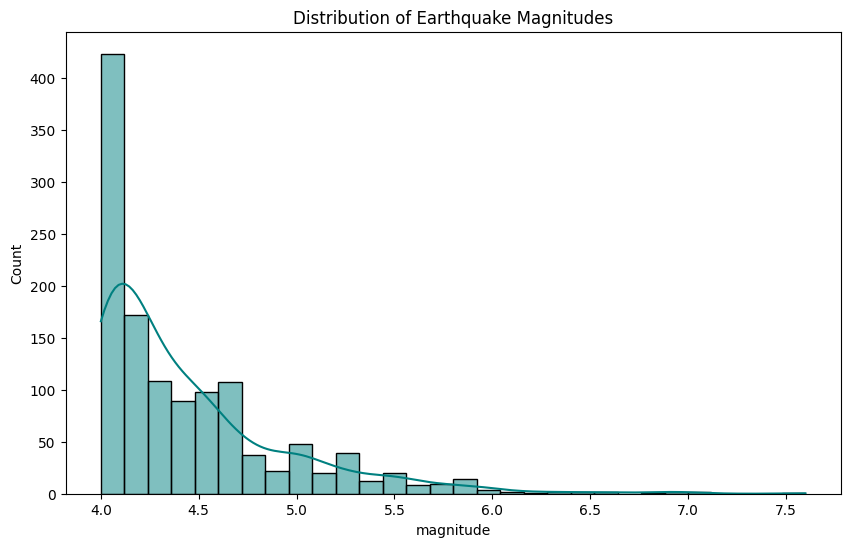

Text(0.5, 1.0, 'Top 10 Epicenter Locations')

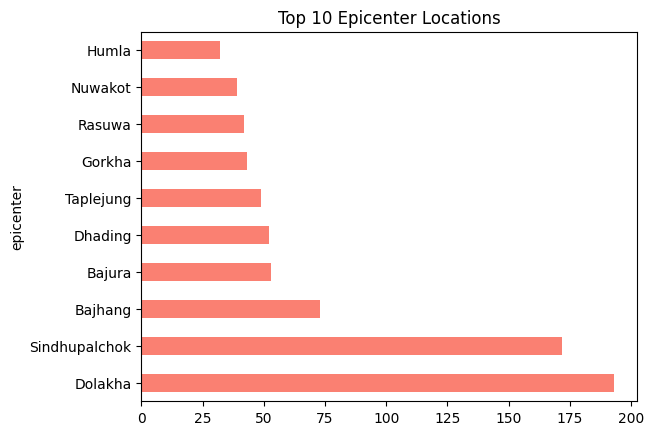

In [29]:


# Distribution of Magnitude
plt.figure(figsize=(10, 6))
sns.histplot(df_EDA['magnitude'], bins=30, kde=True, color='teal')
plt.title('Distribution of Earthquake Magnitudes')
plt.show()

# Top 10 Epicenters
df_EDA['epicenter'].value_counts().head(10).plot(kind='barh', color='salmon')
plt.title('Top 10 Epicenter Locations')

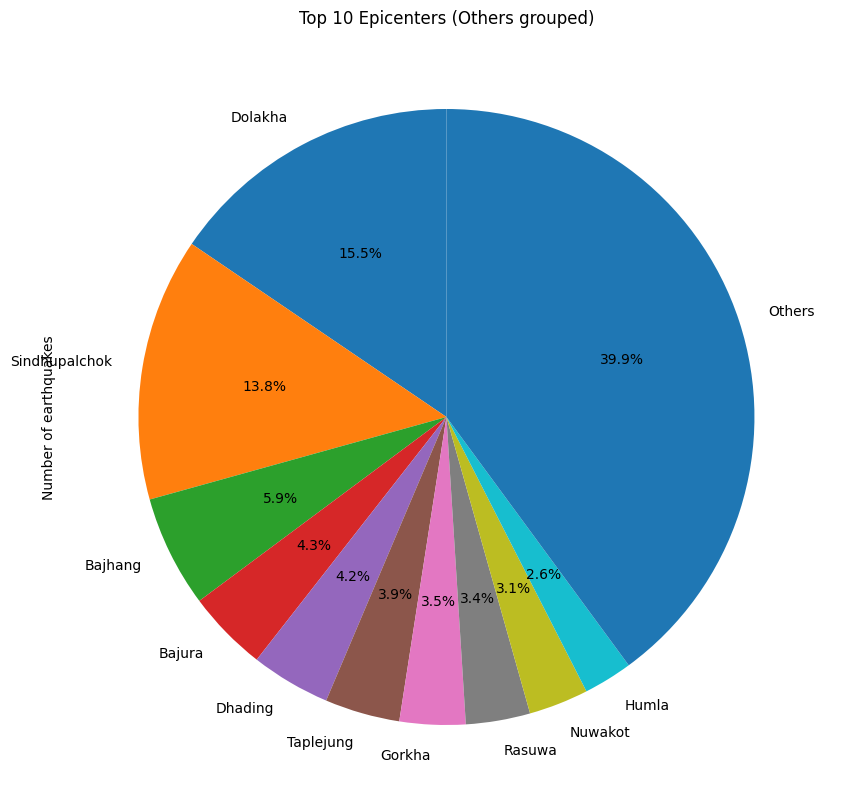

In [30]:

N = 10  # top epicenters to show

counts = df_EDA["epicenter"].value_counts()

top = counts.head(N)
others = counts.iloc[N:].sum()

plot_data = top.copy()
plot_data["Others"] = others

plot_data.plot(
    kind="pie",
    figsize=(15,10),
    autopct='%1.1f%%',
    startangle=90

)


plt.ylabel("Number of earthquakes")
plt.title(f"Top {N} Epicenters (Others grouped)")
plt.xticks(rotation=45, ha="right")
plt.show()


# Distribution of Earthquake Magnitudes
- Most Common Strength: The tallest bar represents the Mode—the magnitude that happens most frequently (usually between 4.0 and 5.0).

- The "Gap" (Data Limit): If there are almost no bars for very small earthquakes (e.g., under 3.5), it means the sensors aren't catching them, not that they aren't happening.

- Power of the "Tail": The few tiny bars on the far right (magnitudes 7.0–8.0+) are rare but represent the deadliest events (like the 2015 Gorkha earthquake).

- Seismic Pattern: A "right-skewed" shape (tall on the left, thin on the right) is normal. It proves the Gutenberg-Richter Law: there are thousands of small earthquakes for every one major disaster.

- Data Quality Check: A smooth curve shows high-quality, cleaned data. Large, random "spikes" might indicate errors or duplicate records in your raw file.

#  Top Epicenter Locations (The Bar Chart)
- Hotspot Identification: This chart identifies specific districts that experience the highest frequency of seismic events.

- Dolakha & Sindhupalchok: These districts often appear at the top of Nepal’s seismic records because they were the primary locations for the 2015 aftershocks.

- Tectonic Stress Zones: The height of the bars in these locations points to active fault lines, particularly the Main Himalayan Thrust, where the most stress is released.

- ata Completeness: High counts in certain areas can also reflect better sensor coverage near the capital, Kathmandu, compared to more remote western regions.

In [31]:
def mag_info(mag):
    """
    Returns danger level and color based on earthquake magnitude.
    """
    if pd.isna(mag):
        return "Unknown", "gray"
    if mag < 2.0:
        return "Micro", "lightgreen"
    elif mag < 4.0:
        return "Minor", "green"
    elif mag < 5.0:
        return "Light", "yellow"
    elif mag < 6.0:
        return "Moderate", "orange"
    elif mag < 7.0:
        return "Strong", "darkorange"
    elif mag < 8.0:
        return "Major", "red"
    elif mag < 9.0:
        return "Great", "darkred"
    else:
        return "Massive", "purple"


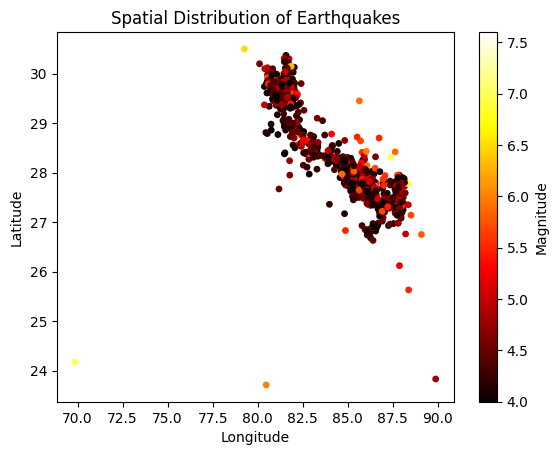

In [32]:
plt.scatter(
    df_EDA["longitude"],
    df_EDA["latitude"],
    c=df_EDA["magnitude"],
    cmap="hot",
    s=15
)
plt.colorbar(label="Magnitude")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Spatial Distribution of Earthquakes")
plt.show()


# What we can see in this scatterplot
- (Points which are together) Earthquake inside the border of THE NEPAL
- (Points which are away) Earthquake outside the border of THE NEPAL
- On the right is degree of the magnitude of the earthquake 


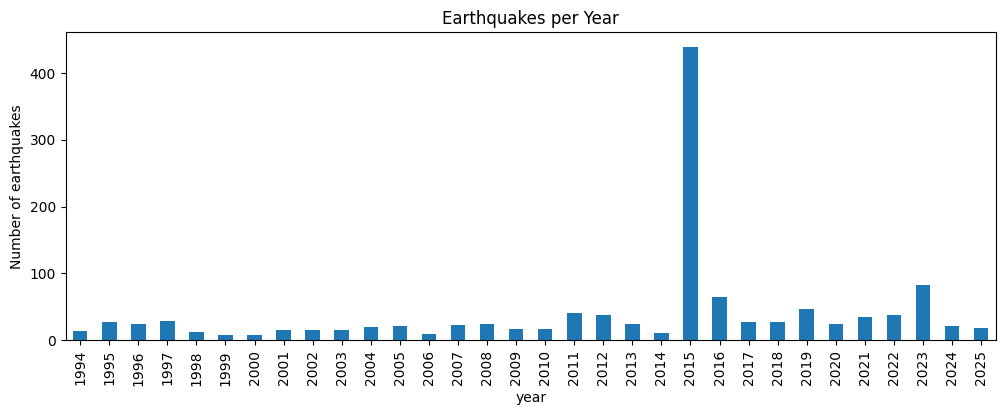

In [33]:
df_EDA["year"] = df_EDA["datetime_utc"].dt.year
df_EDA.groupby("year").size().plot(kind="bar", figsize=(12,4))
plt.ylabel("Number of earthquakes")
plt.title("Earthquakes per Year")
plt.show()


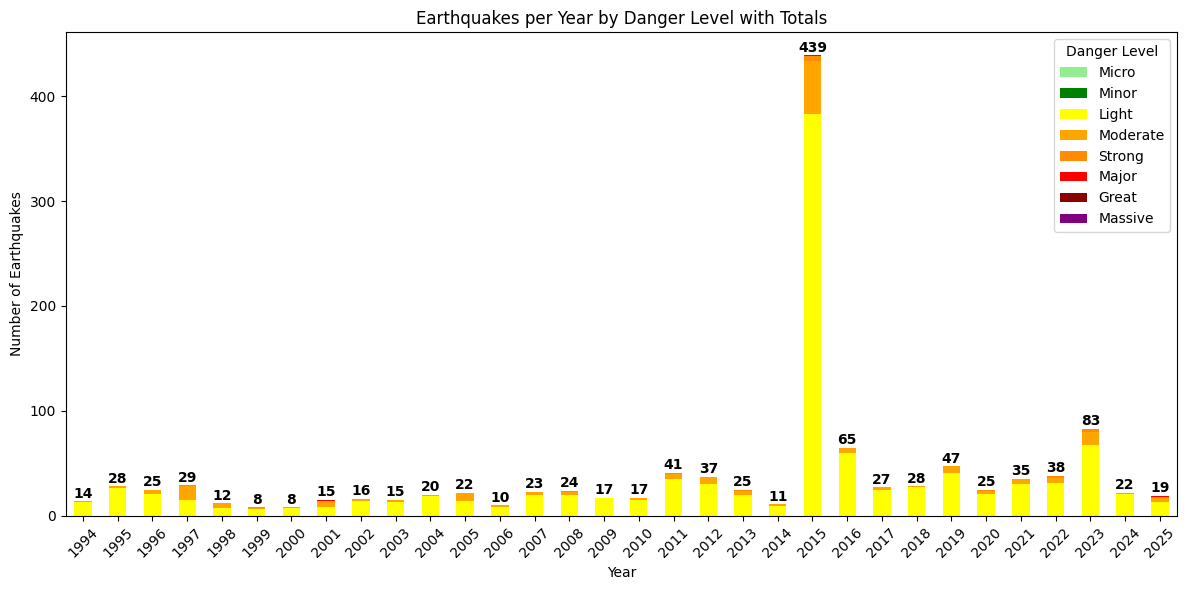

In [34]:

# --- Categorize magnitudes using mag_info ---
df_EDA['danger_level'] = df_EDA['magnitude'].apply(lambda x: mag_info(x)[0])
# --- Count per year per danger level ---
count_df = df_EDA.groupby(['year', 'danger_level']).size().unstack(fill_value=0)

# --- Add total per year ---
count_df['total'] = count_df.sum(axis=1)

# --- Define order of danger levels ---
danger_order = ["Micro","Minor","Light","Moderate","Strong","Major","Great","Massive"]

# Reindex columns to include all danger levels, even if missing
plot_df = count_df.reindex(columns=danger_order, fill_value=0)

colors = ["lightgreen","green","yellow","orange","darkorange","red","darkred","purple"]

# --- Plot stacked bar chart ---
ax = plot_df.plot(kind='bar', stacked=True, figsize=(12,6), color=colors)

# --- Add total labels on top of bars ---
for i, total in enumerate(count_df['total']):
    ax.text(i, total + 0.5, str(total), ha='center', va='bottom', fontweight='bold')

plt.xlabel("Year")
plt.ylabel("Number of Earthquakes")
plt.title("Earthquakes per Year by Danger Level with Totals")
plt.legend(title="Danger Level")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#  Temporal Trends (Earthquakes per Year)
- This bar chart tracks seismic activity over three decades.

- The 2015 Surge: There is a massive, unprecedented spike in 2015 with over 400 earthquakes recorded. This clearly visualizes the Gorkha earthquake and its subsequent intense aftershock period.

- Baseline Activity: Between 1994 and 2014, Nepal averaged roughly 10–30 earthquakes per year above the recording threshold.

- Recent Activity: A notable increase is visible in 2023 (approx. 80 events), likely indicating a significant earthquake event or a swarm in Western Nepal (Jajarkot/Bajhang areas).

- Current State: Data for 2025 shows a return to lower baseline levels, though the year is still in progress.

In [35]:
df_EDA["hour"] = df_EDA["datetime_utc"].dt.hour


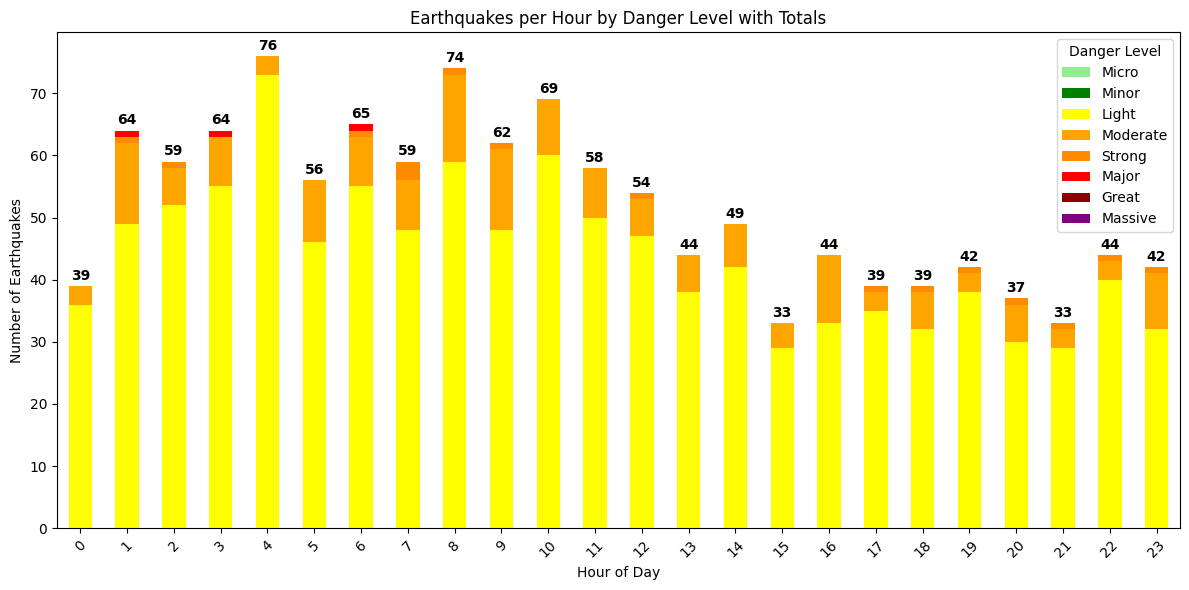

In [36]:

df_EDA['danger_level'] = df_EDA['magnitude'].apply(lambda x: mag_info(x)[0])
count_df = df_EDA.groupby(['hour', 'danger_level']).size().unstack(fill_value=0)

count_df['total'] = count_df.sum(axis=1)

danger_order = ["Micro","Minor","Light","Moderate","Strong","Major","Great","Massive"]

plot_df = count_df.reindex(columns=danger_order, fill_value=0)

colors = ["lightgreen","green","yellow","orange","darkorange","red","darkred","purple"]

ax = plot_df.plot(kind='bar', stacked=True, figsize=(12,6), color=colors)

for i, total in enumerate(count_df['total']):
    ax.text(i, total + 0.5, str(total), ha='center', va='bottom', fontweight='bold')

plt.xlabel("Hour of Day")
plt.ylabel("Number of Earthquakes")
plt.title("Earthquakes per Hour by Danger Level with Totals")
plt.legend(title="Danger Level")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


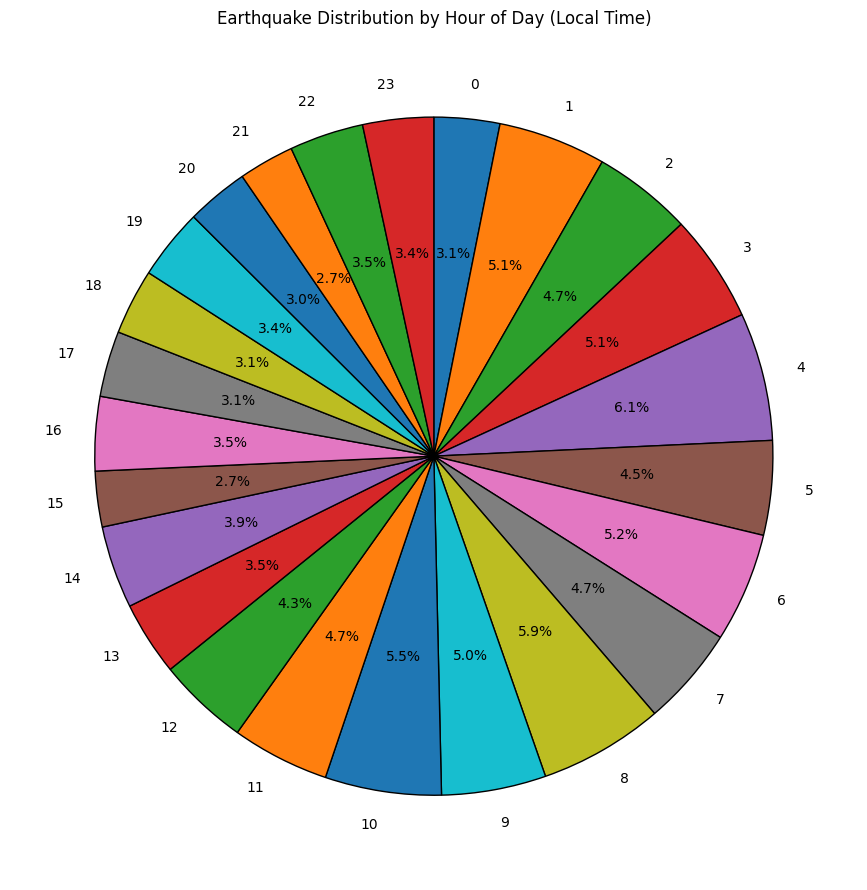

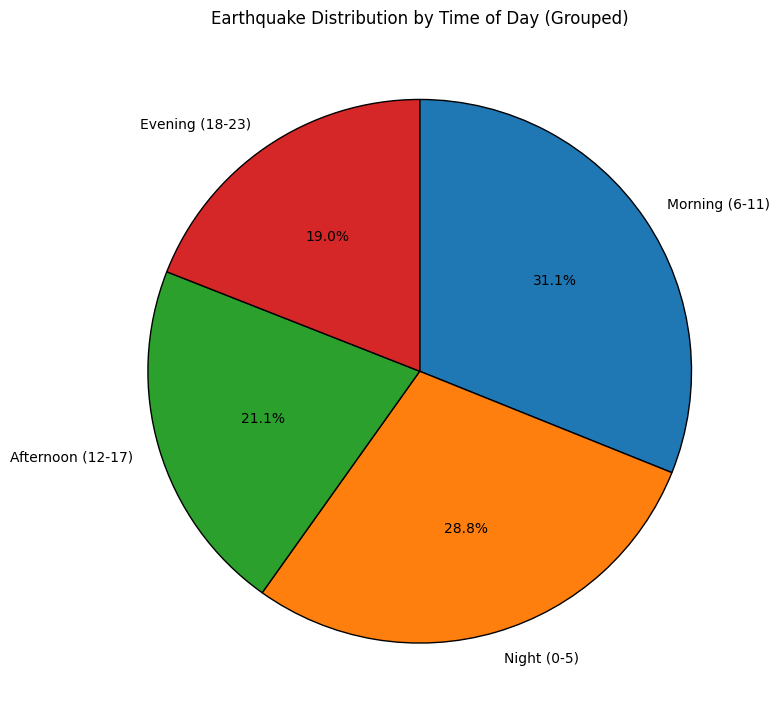

In [37]:
# --- 1. Pie chart per hour ---
hour_counts = df_EDA['hour'].value_counts().sort_index()

plt.figure(figsize=(9,9))
plt.pie(hour_counts, labels=hour_counts.index,
        autopct='%1.1f%%', startangle=90, counterclock=False,
        wedgeprops={'edgecolor':'black'})
plt.title("Earthquake Distribution by Hour of Day (Local Time)")
plt.tight_layout()
plt.show()


# --- 2. Pie chart grouped into time ranges ---
# Define ranges: Night (0-5), Morning (6-11), Afternoon (12-17), Evening (18-23)
def time_range(h):
    if 0 <= h <= 5:
        return "Night (0-5)"
    elif 6 <= h <= 11:
        return "Morning (6-11)"
    elif 12 <= h <= 17:
        return "Afternoon (12-17)"
    else:
        return "Evening (18-23)"

df_EDA['time_range'] = df_EDA['hour'].apply(time_range)

range_counts = df_EDA['time_range'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(range_counts, labels=range_counts.index,
        autopct='%1.1f%%', startangle=90, counterclock=False,
        wedgeprops={'edgecolor':'black'})
plt.title("Earthquake Distribution by Time of Day (Grouped)")
plt.tight_layout()
plt.show()


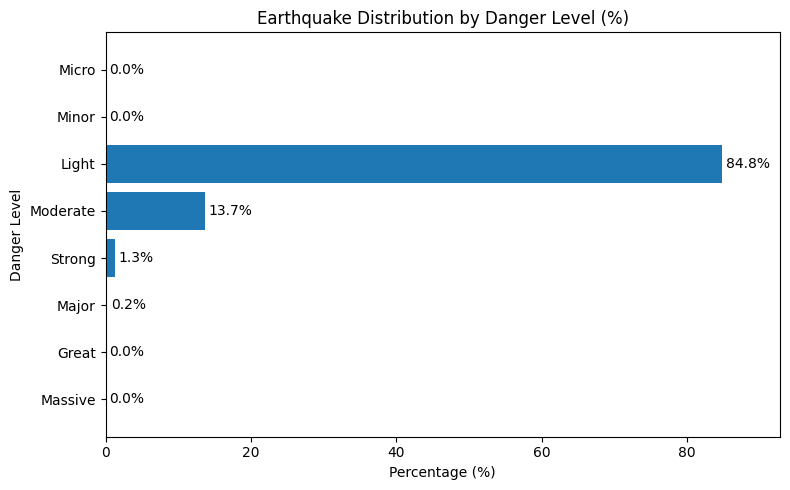

In [38]:
import matplotlib.pyplot as plt

# Count & percentage
counts = df_EDA['danger_level'].value_counts().reindex(danger_order, fill_value=0)
percent = counts / counts.sum() * 100

fig, ax = plt.subplots(figsize=(8, 5))

bars = ax.barh(
    percent.index,
    percent.values
)

# Add percentage labels
for bar in bars:
    width = bar.get_width()
    ax.text(
        width + 0.5,
        bar.get_y() + bar.get_height()/2,
        f"{width:.1f}%",
        va="center",
        fontsize=10
    )

ax.set_xlabel("Percentage (%)")
ax.set_ylabel("Danger Level")
ax.set_title("Earthquake Distribution by Danger Level (%)")
ax.set_xlim(0, percent.max() + 8)
ax.invert_yaxis()  # highest on top

plt.tight_layout()
plt.show()


In [39]:
df_EDA.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1245 entries, 0 to 1244
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            1245 non-null   object        
 1   time            1245 non-null   object        
 2   latitude        1245 non-null   float64       
 3   longitude       1245 non-null   float64       
 4   magnitude       1245 non-null   float64       
 5   epicenter       1245 non-null   object        
 6   date_ad         1245 non-null   object        
 7   date_bs         1245 non-null   object        
 8   local_time      1245 non-null   object        
 9   utc_time        1245 non-null   object        
 10  datetime_local  1245 non-null   datetime64[ns]
 11  datetime_utc    1245 non-null   datetime64[ns]
 12  datetime_npt    1245 non-null   datetime64[ns]
 13  timezone        1245 non-null   object        
 14  year            1245 non-null   int32         
 15  dang

This show that high number of earthquack are range form 4.9 - 4.9

In [40]:
df_EDA.dtypes

date                      object
time                      object
latitude                 float64
longitude                float64
magnitude                float64
epicenter                 object
date_ad                   object
date_bs                   object
local_time                object
utc_time                  object
datetime_local    datetime64[ns]
datetime_utc      datetime64[ns]
datetime_npt      datetime64[ns]
timezone                  object
year                       int32
danger_level              object
hour                       int32
time_range                object
dtype: object

In [41]:
df_EDA

,date,time,latitude,longitude,magnitude,epicenter,date_ad,date_bs,local_time,utc_time,datetime_local,datetime_utc,datetime_npt,timezone,year,danger_level,hour,time_range
0,B.S.: 2082-05-06A.D.: 2025-08-22,Local: 23:15UTC: 17:30,27.54,87.14,4.4,Sankhuwasabha*,2025-08-22,2082-05-06,23:15,17:30,2025-08-22 23:15:00,2025-08-22 17:30:00,2025-08-22 23:15:00,UTC,2025,Light,17,Afternoon (12-17)
1,B.S.: 2082-05-01A.D.: 2025-08-17,Local: 15:43UTC: 09:58,27.70,86.53,4.0,Ramechhap,2025-08-17,2082-05-01,15:43,09:58,2025-08-17 15:43:00,2025-08-17 09:58:00,2025-08-17 15:43:00,UTC,2025,Light,9,Morning (6-11)
2,B.S.: 2081-12-21A.D.: 2025-04-04,Local: 20:10UTC: 14:25,28.96,82.12,5.5,Jajarkot,2025-04-04,2081-12-21,20:10,14:25,2025-04-04 20:10:00,2025-04-04 14:25:00,2025-04-04 20:10:00,UTC,2025,Moderate,14,Afternoon (12-17)
3,B.S.: 2081-12-21A.D.: 2025-04-04,Local: 20:07UTC: 14:22,28.95,82.12,5.2,Jajarkot,2025-04-04,2081-12-21,20:07,14:22,2025-04-04 20:07:00,2025-04-04 14:22:00,2025-04-04 20:07:00,UTC,2025,Moderate,14,Afternoon (12-17)
4,B.S.: 2081-12-20A.D.: 2025-04-03,Local: 17:04UTC: 11:19,30.02,80.84,4.0,Darchula,2025-04-03,2081-12-20,17:04,11:19,2025-04-03 17:04:00,2025-04-03 11:19:00,2025-04-03 17:04:00,UTC,2025,Light,11,Morning (6-11)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1240,B.S.: 2051-03-11A.D.: 1994-06-25,Local: 14:17UTC: 08:32,27.82,86.19,5.1,Dolakha,1994-06-25,2051-03-11,14:17,08:32,1994-06-25 14:17:00,1994-06-25 08:32:00,1994-06-25 14:17:00,UTC,1994,Moderate,8,Morning (6-11)
1241,B.S.: 2051-02-11A.D.: 1994-05-25,Local: 12:00UTC: 06:15,29.81,81.77,4.0,Bajura,1994-05-25,2051-02-11,12:00,06:15,1994-05-25 12:00:00,1994-05-25 06:15:00,1994-05-25 12:00:00,UTC,1994,Light,6,Morning (6-11)
1242,B.S.: 2051-02-11A.D.: 1994-05-25,Local: 19:10UTC: 13:25,29.80,82.41,4.5,Mugu,1994-05-25,2051-02-11,19:10,13:25,1994-05-25 19:10:00,1994-05-25 13:25:00,1994-05-25 19:10:00,UTC,1994,Light,13,Afternoon (12-17)
1243,B.S.: 2051-01-20A.D.: 1994-05-03,Local: 00:30UTC: 18:45,28.52,83.03,4.4,Baglung,1994-05-03,2051-01-20,00:30,18:45,1994-05-03 00:30:00,1994-05-03 18:45:00,1994-05-04 00:30:00,UTC,1994,Light,18,Evening (18-23)


In [42]:
import folium
from folium.plugins import MarkerCluster

# Drop rows with missing coordinates
df_map = df_EDA.dropna(subset=["latitude", "longitude"]).copy()

# --- Function to get both danger level and color ---

# --- Create base map centered on Nepal ---
m = folium.Map(location=[28.2, 84.0], zoom_start=7, tiles="OpenStreetMap")

# --- Add marker cluster ---
cluster = MarkerCluster(name="Earthquakes").add_to(m)

# --- Add circle markers ---
for _, row in df_map.iterrows():
    mag = row.get("magnitude", None)
    level, color = mag_info(mag)
    
    popup_text = f"""
    <b>Epicenter:</b> {row.get('epicenter','N/A')}<br>
    <b>Magnitude:</b> {mag if mag is not None else 'N/A'}<br>
    <b>Danger Level:</b> {level}<br>
    <b>Datetime:</b> {row.get('AD_Local_dt','')}
    """
    tooltip_text = f"{row.get('epicenter','N/A')} — Mag: {mag if mag is not None else 'N/A'}"
    
    # Dynamic radius: exaggerate larger magnitudes
    radius = 4 if pd.isna(mag) else 3 + mag**1.5
    
    folium.CircleMarker(
        location=[row["latitude"], row["longitude"]],
        radius=radius,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        popup=folium.Popup(popup_text, max_width=300),
        tooltip=tooltip_text
    ).add_to(cluster)

# --- Add layer control ---
folium.LayerControl().add_to(m)

# --- Add custom legend ---
legend_html = """
<div style="
    position: fixed;
    bottom: 50px; left: 50px; width: 180px; height: 270px;
    background-color: white; border:2px solid grey; z-index:9999; font-size:14px;
    padding: 10px;
">
<b>Earthquake Legend</b><br>
<i style="background:lightgreen;">&nbsp;&nbsp;&nbsp;&nbsp;</i> Micro &lt;2.0<br>
<i style="background:green;">&nbsp;&nbsp;&nbsp;&nbsp;</i> Minor 2.0–3.9<br>
<i style="background:yellow;">&nbsp;&nbsp;&nbsp;&nbsp;</i> Light 4.0–4.9<br>
<i style="background:orange;">&nbsp;&nbsp;&nbsp;&nbsp;</i> Moderate 5.0–5.9<br>
<i style="background:darkorange;">&nbsp;&nbsp;&nbsp;&nbsp;</i> Strong 6.0–6.9<br>
<i style="background:red;">&nbsp;&nbsp;&nbsp;&nbsp;</i> Major 7.0–7.9<br>
<i style="background:darkred;">&nbsp;&nbsp;&nbsp;&nbsp;</i> Great 8.0–8.9<br>
<i style="background:purple;">&nbsp;&nbsp;&nbsp;&nbsp;</i> Massive ≥9.0
</div>
"""
m.get_root().html.add_child(folium.Element(legend_html))

# --- Save map ---
m.save("nepal_earthquakes_map.html")
print("✅ Map saved as nepal_earthquakes_map.html — open in your browser.")


✅ Map saved as nepal_earthquakes_map.html — open in your browser.


In [43]:
df_EDA.to_csv("earthquake_Nepal_EDA_AFTER.csv", index=False)

In [44]:
df_EDA.iloc[1237]

date              B.S.: 2051-07-05A.D.: 1994-10-22
time                        Local: 13:35UTC: 07:50
latitude                                     28.82
longitude                                    82.22
magnitude                                      4.5
epicenter                                 Jajarkot
date_ad                                 1994-10-22
date_bs                                 2051-07-05
local_time                                   13:35
utc_time                                     07:50
datetime_local                 1994-10-22 13:35:00
datetime_utc                   1994-10-22 07:50:00
datetime_npt                   1994-10-22 13:35:00
timezone                                       UTC
year                                          1994
danger_level                                 Light
hour                                             7
time_range                          Morning (6-11)
Name: 1237, dtype: object

In [45]:
with pd.ExcelWriter(
    "earthquake_Nepal_EDA.xlsx",
    engine="xlsxwriter",
    datetime_format="yyyy-mm-dd hh:mm:ss"
) as writer:
    df_EDA.to_excel(writer, index=False)


In [46]:
df_EDA.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1245 entries, 0 to 1244
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            1245 non-null   object        
 1   time            1245 non-null   object        
 2   latitude        1245 non-null   float64       
 3   longitude       1245 non-null   float64       
 4   magnitude       1245 non-null   float64       
 5   epicenter       1245 non-null   object        
 6   date_ad         1245 non-null   object        
 7   date_bs         1245 non-null   object        
 8   local_time      1245 non-null   object        
 9   utc_time        1245 non-null   object        
 10  datetime_local  1245 non-null   datetime64[ns]
 11  datetime_utc    1245 non-null   datetime64[ns]
 12  datetime_npt    1245 non-null   datetime64[ns]
 13  timezone        1245 non-null   object        
 14  year            1245 non-null   int32         
 15  dang

In [47]:
df_EDA

,date,time,latitude,longitude,magnitude,epicenter,date_ad,date_bs,local_time,utc_time,datetime_local,datetime_utc,datetime_npt,timezone,year,danger_level,hour,time_range
0,B.S.: 2082-05-06A.D.: 2025-08-22,Local: 23:15UTC: 17:30,27.54,87.14,4.4,Sankhuwasabha*,2025-08-22,2082-05-06,23:15,17:30,2025-08-22 23:15:00,2025-08-22 17:30:00,2025-08-22 23:15:00,UTC,2025,Light,17,Afternoon (12-17)
1,B.S.: 2082-05-01A.D.: 2025-08-17,Local: 15:43UTC: 09:58,27.70,86.53,4.0,Ramechhap,2025-08-17,2082-05-01,15:43,09:58,2025-08-17 15:43:00,2025-08-17 09:58:00,2025-08-17 15:43:00,UTC,2025,Light,9,Morning (6-11)
2,B.S.: 2081-12-21A.D.: 2025-04-04,Local: 20:10UTC: 14:25,28.96,82.12,5.5,Jajarkot,2025-04-04,2081-12-21,20:10,14:25,2025-04-04 20:10:00,2025-04-04 14:25:00,2025-04-04 20:10:00,UTC,2025,Moderate,14,Afternoon (12-17)
3,B.S.: 2081-12-21A.D.: 2025-04-04,Local: 20:07UTC: 14:22,28.95,82.12,5.2,Jajarkot,2025-04-04,2081-12-21,20:07,14:22,2025-04-04 20:07:00,2025-04-04 14:22:00,2025-04-04 20:07:00,UTC,2025,Moderate,14,Afternoon (12-17)
4,B.S.: 2081-12-20A.D.: 2025-04-03,Local: 17:04UTC: 11:19,30.02,80.84,4.0,Darchula,2025-04-03,2081-12-20,17:04,11:19,2025-04-03 17:04:00,2025-04-03 11:19:00,2025-04-03 17:04:00,UTC,2025,Light,11,Morning (6-11)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1240,B.S.: 2051-03-11A.D.: 1994-06-25,Local: 14:17UTC: 08:32,27.82,86.19,5.1,Dolakha,1994-06-25,2051-03-11,14:17,08:32,1994-06-25 14:17:00,1994-06-25 08:32:00,1994-06-25 14:17:00,UTC,1994,Moderate,8,Morning (6-11)
1241,B.S.: 2051-02-11A.D.: 1994-05-25,Local: 12:00UTC: 06:15,29.81,81.77,4.0,Bajura,1994-05-25,2051-02-11,12:00,06:15,1994-05-25 12:00:00,1994-05-25 06:15:00,1994-05-25 12:00:00,UTC,1994,Light,6,Morning (6-11)
1242,B.S.: 2051-02-11A.D.: 1994-05-25,Local: 19:10UTC: 13:25,29.80,82.41,4.5,Mugu,1994-05-25,2051-02-11,19:10,13:25,1994-05-25 19:10:00,1994-05-25 13:25:00,1994-05-25 19:10:00,UTC,1994,Light,13,Afternoon (12-17)
1243,B.S.: 2051-01-20A.D.: 1994-05-03,Local: 00:30UTC: 18:45,28.52,83.03,4.4,Baglung,1994-05-03,2051-01-20,00:30,18:45,1994-05-03 00:30:00,1994-05-03 18:45:00,1994-05-04 00:30:00,UTC,1994,Light,18,Evening (18-23)
